In [2]:
dataCSV=[
    "../All_Data/220329走路拿放資料59s/手2022-03-28 220700.csv",
    "../All_Data/220329走路拿放資料59s/手2022-03-28 220900.csv",
    "../All_Data/220329走路拿放資料59s/手2022-03-28 221100.csv",
    "../All_Data/220329走路拿放資料59s/手2022-03-28 221400.csv",
    "../All_Data/220329走路拿放資料59s/手2022-03-28 221500.csv",
    "../All_Data/220329走路拿放資料59s/手2022-03-28 221700.csv",
    "../All_Data/220329走路拿放資料59s/手2022-03-28 221900.csv",
    "../All_Data/220329走路拿放資料59s/手2022-03-28 222000.csv",

    "../All_Data/220329走路拿放資料59s/腳2022-03-28 220700.csv",
    "../All_Data/220329走路拿放資料59s/腳2022-03-28 220900.csv",
    "../All_Data/220329走路拿放資料59s/腳2022-03-28 221100.csv",
    "../All_Data/220329走路拿放資料59s/腳2022-03-28 221400.csv",
    "../All_Data/220329走路拿放資料59s/腳2022-03-28 221500.csv",
    "../All_Data/220329走路拿放資料59s/腳2022-03-28 221700.csv",
    "../All_Data/220329走路拿放資料59s/腳2022-03-28 221900.csv",
    "../All_Data/220329走路拿放資料59s/腳2022-03-28 222000.csv",
]
index=1
# 157 398 326 324 40 6 8 300 
# 157 391 314 319 37 1 0 296


Set file Name

In [3]:
fileName=[]
for i in range(len(dataCSV)):
    newFilename = dataCSV[i].split('/')
    fileName.append(newFilename[len(newFilename)-1][0:len(newFilename[len(newFilename)-1])-4])

Pre-processing

In [4]:
def preProcessing(data):
    for i in range(len(data[:,14])-1,-1,-1):
        data[i,14]=data[i,14]-data[0,14]
    return data
    


Smooth by d

In [5]:
def smooth(data,d):
    newData=[]
    for i in range (0,len(data[:,0])-d+1,d):
        tempJ=[]
        for j in range(0,15):
            tempK=0
            for k in range(d):
                # print(data[i+k][j])
                tempK += data[i+k][j]
                # print("tempK = " + str(tempK))
            tempJ.append(tempK/d)
            # print(tempJ)
        newData.append(tempJ)
    return np.array(newData)

In [6]:
def QuickPlot(i):
    line=["Xg","Yg","Zg","Xm","Ym","Zm","Xa","Ya","Za","Xq","Yq","Zq","direc"]
    colorSet=['r','g','b','y']
    if(i!=13):
        plt.plot(data[:,14], data[: , i], color = colorSet[i%3], label = line[i-1])
    else:
        plt.plot(data[:,14], data[: , i], color = colorSet[3], label = line[i-1])
    
def draw(data):
    for i in range(0,10,3):
        plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
        plt.xlabel("time", fontsize = 40, labelpad = 20)
        plt.xticks(fontsize = 30)
        plt.yticks(fontsize = 30)
        QuickPlot(i+1)
        QuickPlot(i+2)
        QuickPlot(i+3)
        if(i==9):
            QuickPlot(i+4)
        plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
        plt.show()

In [10]:
print(str(fileName[index][1:]))

2022-03-28 220900


In [20]:
def mkdir(path):
    #判斷目錄是否存在
    #存在：True
    #不存在：False
    folder = os.path.exists(path)

    #判斷結果
    if not folder:
        #如果不存在，則建立新目錄
        os.makedirs(path)
        print('-----建立成功-----')

    else:
        #如果目錄已存在，則不建立，提示目錄已存在
        print(path+'目錄已存在')
path = 'image/' + fileName[index][1:]
mkdir(path)

-----建立成功-----


In [21]:
import os
def drawfft(data):
    line=["Xg","Yg","Zg","Xm","Ym","Zm","Xa","Ya","Za","Xq","Yq","Zq","direc"]
    colorSet=['r','g','b','y']
    for i in range (len(line)):
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel('Time',fontsize = 10)
        plt.title(str(line[i])+' transfrom',fontsize = 10) 
        plt.specgram(data[:,1+i],Fs=1,NFFT=18,noverlap=17,cmap='plasma',)
        plt.savefig('./image/' +fileName[index][1:]+'/'+ fileName[index]+'_'+ line[i]+'.pdf')
        plt.show()
    # if(i!=13):
    #     plt.plot(data[:,14], data[: , i], color = colorSet[i%3], label = line[i-1])
    # else:
    #     plt.plot(data[:,14], data[: , i], color = colorSet[3], label = line[i-1])

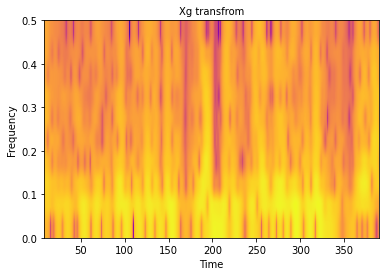

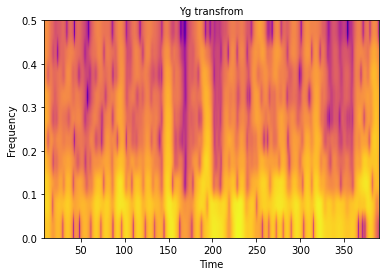

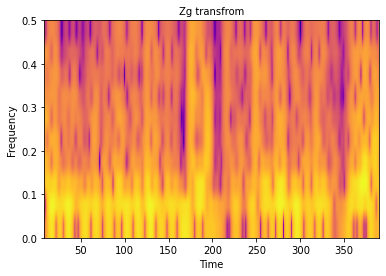

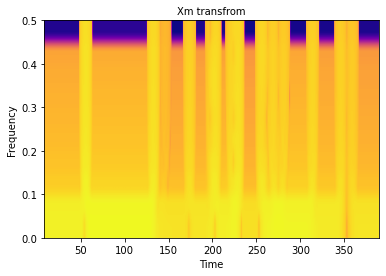

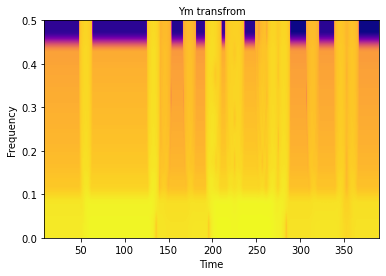

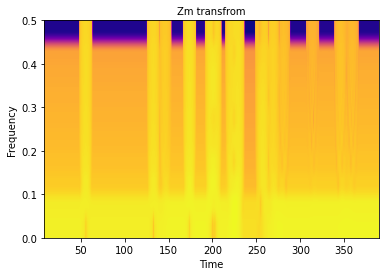

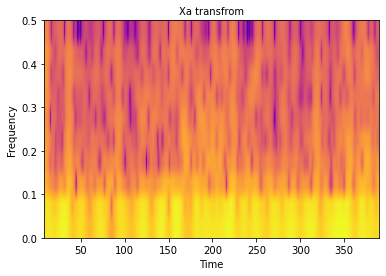

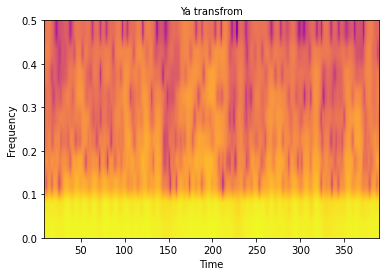

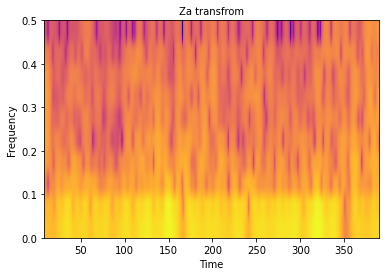

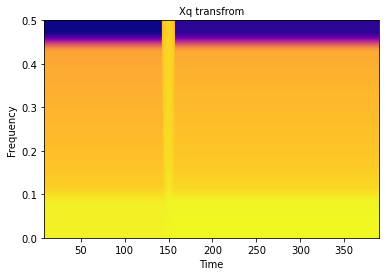

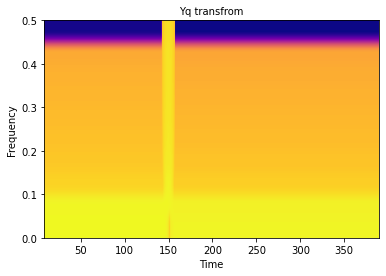

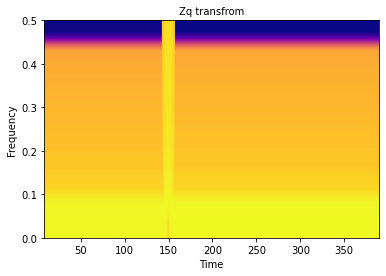

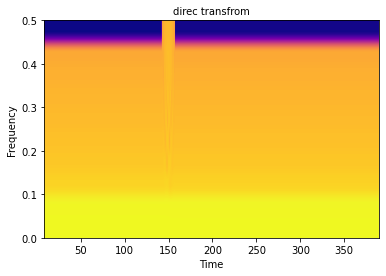

In [22]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

data = pd.read_csv(dataCSV[index])
data = np.array(data)

data = preProcessing(data)
# data = smooth(data,3)
    
drawfft(data)   
